# 🥑 Avocado Ripeness Prediction Project

## 📌 Objective
Build a robust machine learning model to predict the **ripeness stage** of avocados using sensor and color data, aiming for **>90% accuracy**.

---









---


```python
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(\"Best Parameters:\", grid_search.best_params_)


## ✅ Step-by-Step Process

### 1. Load Libraries and Dataset
- `pandas`, `numpy` for data handling.
- `matplotlib`, `seaborn` for EDA.
- `sklearn` for ML modeling.
- `catboost`, `lightgbm` for advanced classifiers.

In [1]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")


In [28]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [27]:
# !pip install catboost
# !pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 1.3 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 1.2 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.2 MB/s eta 0:00:00


In [29]:
df = pd.read_csv("../Dataset/avocado_ripeness_dataset.csv")

In [30]:
df.sample(10)

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
188,97.0,96,84,53,dark green,78,224,125,hard
11,45.4,299,60,59,purple,58,203,234,breaking
58,35.0,3,45,13,black,54,196,227,firm-ripe
177,13.9,20,40,17,black,37,185,298,ripe
4,42.5,303,58,32,purple,63,200,227,breaking
127,17.2,11,56,35,black,36,192,265,ripe
134,76.1,70,67,78,green,65,233,190,pre-conditioned
142,66.1,64,75,74,green,65,258,158,pre-conditioned
79,10.8,24,34,20,black,40,187,267,ripe
190,30.7,298,79,45,purple,47,177,220,firm-ripe


In [31]:
df['ripeness'].unique()

array(['ripe', 'pre-conditioned', 'hard', 'breaking', 'firm-ripe'],
      dtype=object)

In [32]:
df.tail(5)

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
245,94.1,83,80,58,dark green,72,254,134,hard
246,21.6,17,36,19,black,47,182,240,firm-ripe
247,14.0,4,40,17,black,37,188,274,ripe
248,61.5,63,87,75,green,65,261,162,pre-conditioned
249,17.8,27,30,36,black,40,190,272,ripe


In [33]:
df.isna().sum()

firmness          0
hue               0
saturation        0
brightness        0
color_category    0
sound_db          0
weight_g          0
size_cm3          0
ripeness          0
dtype: int64

### 2. Exploratory Data Analysis (EDA)
- Check `head()`, `describe()`, `isnull().sum()` for data overview.
- Plot **target class distribution** using `sns.countplot()`.
- Plot **feature correlation heatmap** using `sns.heatmap()`.

In [36]:
df.describe()

,firmness,hue,saturation,brightness,sound_db,weight_g,size_cm3
count,250.000000,250.00000,250.000000,250.00000,250.000000,250.000000,250.000000
mean,50.618400,125.94400,64.356000,45.07200,58.016000,220.188000,208.644000
std,27.277678,117.13767,17.377144,19.11629,13.838126,34.405225,55.940564
min,10.300000,1.00000,30.000000,10.00000,30.000000,152.000000,100.000000
25%,25.750000,25.25000,51.250000,31.00000,47.250000,193.250000,155.250000
50%,48.950000,77.00000,65.000000,46.00000,60.000000,220.000000,218.000000
75%,74.050000,278.75000,76.750000,58.00000,68.000000,245.000000,260.500000
max,98.800000,329.00000,99.000000,78.00000,79.000000,299.000000,299.000000


In [38]:
print("Dataset Overview:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Overview:
   firmness  hue  saturation  brightness color_category  sound_db  weight_g  \
0      14.5   19          40          26          black        34       175   
1      71.7   53          69          75          green        69       206   
2      88.5   60          94          46     dark green        79       220   
3      93.8  105          87          41     dark green        75       299   
4      42.5  303          58          32         purple        63       200   

   size_cm3         ripeness  
0       261             ripe  
1       185  pre-conditioned  
2       143             hard  
3       140             hard  
4       227         breaking  

Summary Statistics:
         firmness        hue  saturation  brightness    sound_db    weight_g  \
count  250.000000  250.00000  250.000000   250.00000  250.000000  250.000000   
mean    50.618400  125.94400   64.356000    45.07200   58.016000  220.188000   
std     27.277678  117.13767   17.377144    19.11629   13.83

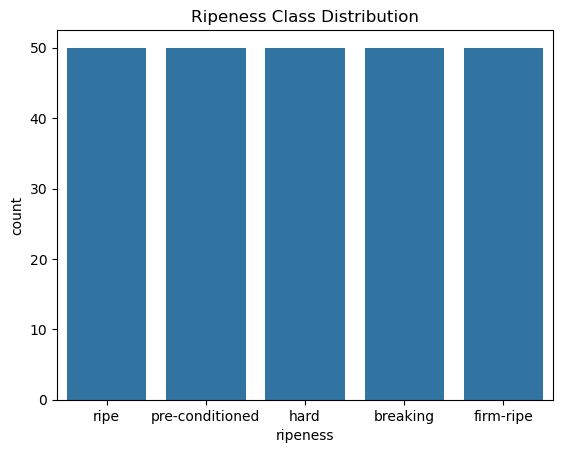

In [39]:
# Distribution of target classes
sns.countplot(data=df, x='ripeness')
plt.title('Ripeness Class Distribution')
plt.show()



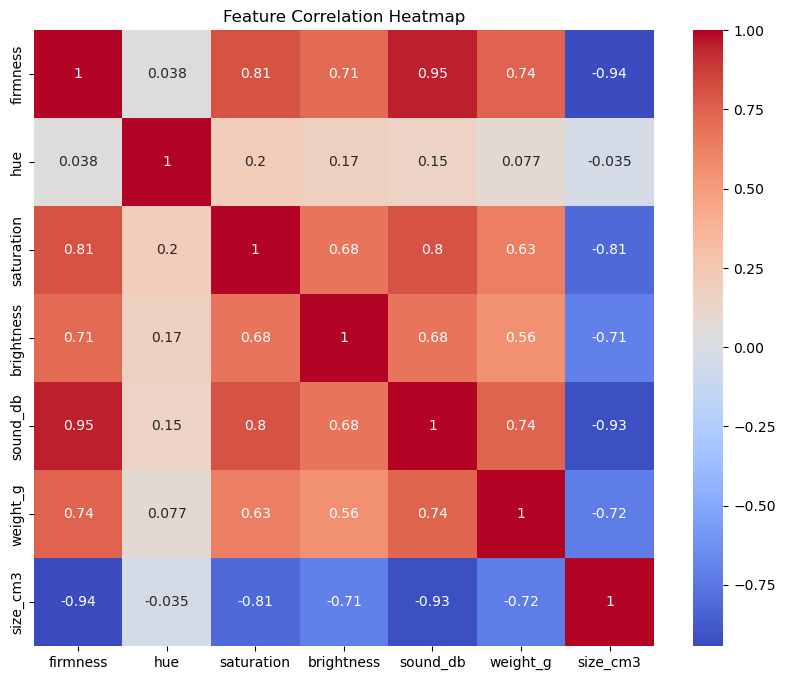

In [41]:
plt.figure(figsize=(10, 8))
numeric_df = df.drop('ripeness', axis=1).select_dtypes(include=['number'])  # Only keep numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


### 3. Data Preprocessing
- Encode categorical features using `LabelEncoder`.
- Scale features using `StandardScaler`.
- Split data with `train_test_split(test_size=0.2, stratify=y)`.

In [43]:
df.columns

Index(['firmness', 'hue', 'saturation', 'brightness', 'color_category',
       'sound_db', 'weight_g', 'size_cm3', 'ripeness'],
      dtype='object')

In [55]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

# Fit and transform the 'ripeness' column
df['ripeness_numeric'] = le.fit_transform(df['ripeness'])




In [46]:
df

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness,ripeness_numeric
0,14.5,19,40,26,black,34,175,261,ripe,4
1,71.7,53,69,75,green,69,206,185,pre-conditioned,3
2,88.5,60,94,46,dark green,79,220,143,hard,2
3,93.8,105,87,41,dark green,75,299,140,hard,2
4,42.5,303,58,32,purple,63,200,227,breaking,0
...,...,...,...,...,...,...,...,...,...,...
245,94.1,83,80,58,dark green,72,254,134,hard,2
246,21.6,17,36,19,black,47,182,240,firm-ripe,1
247,14.0,4,40,17,black,37,188,274,ripe,4
248,61.5,63,87,75,green,65,261,162,pre-conditioned,3


In [49]:
X = df.drop('ripeness', axis=1)
y = df['ripeness_numeric']

In [51]:
X

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness_numeric
0,14.5,19,40,26,black,34,175,261,4
1,71.7,53,69,75,green,69,206,185,3
2,88.5,60,94,46,dark green,79,220,143,2
3,93.8,105,87,41,dark green,75,299,140,2
4,42.5,303,58,32,purple,63,200,227,0
...,...,...,...,...,...,...,...,...,...
245,94.1,83,80,58,dark green,72,254,134,2
246,21.6,17,36,19,black,47,182,240,1
247,14.0,4,40,17,black,37,188,274,4
248,61.5,63,87,75,green,65,261,162,3


In [52]:
y

0      4
1      3
2      2
3      2
4      0
      ..
245    2
246    1
247    4
248    3
249    4
Name: ripeness_numeric, Length: 250, dtype: int32

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Handle categorical variables before scaling
X = pd.get_dummies(X, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


In [67]:
X_train.shape

(200, 11)

In [68]:
y_train.shape

(200,)

## 🔍 Hyperparameter Tuning

### A. GridSearchCV (Example: Random Forest)

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [70]:

# Step 1: Define the model
model = RandomForestClassifier(random_state=42)

# Step 2: Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [71]:

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=2,
    n_jobs=-1  # use all CPU cores
)

In [72]:
# Step 4: Fit on training data
grid_search.fit(X_train, y_train)

# Step 5: Best parameters and evaluation
print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

# Evaluate on validation set
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Validation Accuracy: 1.0


### 4. Baseline Models
Train and evaluate:
- `RandomForestClassifier`
- `CatBoostClassifier`
- `LGBMClassifier`

Use `accuracy_score`, `classification_report`, and `confusion_matrix`.

In [73]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


# ✅ Ensure input is list of strings
X_train = list(X_train)
X_test = list(X_test)

# 3. Build a Pipeline with CountVectorizer + Naive Bayes
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('nb', MultinomialNB())
])

# 4. Set up the hyperparameter grid
param_grid = {
    'vect__max_df': [0.75, 1.0],
    'vect__min_df': [1, 2],
    'nb__alpha': [0.1, 0.5, 1.0]
}

# 5. Grid Search with Cross-Validation
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)



ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sujon\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sujon\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Sujon\AppData\Local\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 469, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Sujon\AppData\Local\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 406, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Sujon\AppData\Local\anaconda3\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Sujon\AppData\Local\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 1310, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Sujon\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Sujon\AppData\Local\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py", line 1372, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Sujon\AppData\Local\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py", line 1259, in _count_vocab
    for feature in analyze(doc):
                   ^^^^^^^^^^^^
  File "C:\Users\Sujon\AppData\Local\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py", line 108, in _analyze
    doc = preprocessor(doc)
          ^^^^^^^^^^^^^^^^^
  File "C:\Users\Sujon\AppData\Local\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py", line 66, in _preprocess
    doc = doc.lower()
          ^^^^^^^^^
AttributeError: 'numpy.ndarray' object has no attribute 'lower'


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Encode target
le = LabelEncoder()
y = le.fit_transform(df['ripeness'])

# Encode categorical feature(s) if any (e.g., color_category)
df['color_category'] = LabelEncoder().fit_transform(df['color_category'])

# Prepare features
X = df.drop(columns=['ripeness'])

# Train/test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Train Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_val)

# Evaluation
print("Naive Bayes Accuracy:", accuracy_score(y_val, y_pred_nb))
print(classification_report(y_val, y_pred_nb, target_names=le.classes_))


Naive Bayes Accuracy: 1.0
                 precision    recall  f1-score   support

       breaking       1.00      1.00      1.00        10
      firm-ripe       1.00      1.00      1.00        10
           hard       1.00      1.00      1.00        10
pre-conditioned       1.00      1.00      1.00        10
           ripe       1.00      1.00      1.00        10

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50

